In [40]:
%matplotlib inline
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import sklearn 
import requests
import urllib

import datetime
import time
import os

In [41]:
movies = pd.read_csv('http://bit.ly/imdbratings')
#tips
""" 
#to read specific columns 
movies = pd.read_csv('http://bit.ly/imdbratings' , usecols=[0,4])

#to read specific rows
movies = pd.read_csv('http://bit.ly/imdbratings' , nrows=10)

"""

" \n#to read specific columns \nmovies = pd.read_csv('http://bit.ly/imdbratings' , usecols=[0,4])\n\n#to read specific rows\nmovies = pd.read_csv('http://bit.ly/imdbratings' , nrows=10)\n\n"

In [42]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [43]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [44]:
movies.memory_usage(deep=True).sum()

316977

In [45]:

 #better pracitce for the code below
'''
 (movies
  .select_dtypes(int)
  .describe().T
 )
 '''
movies.select_dtypes(int).describe().T
 

,count,mean,std,min,25%,50%,75%,max
duration,979.0,120.979571,26.21801,64.0,102.0,117.0,134.0,242.0


In [46]:
int_8 = np.iinfo(np.int8)
int_16 = np.iinfo(np.int16)
print(int_8 , int_16)

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------
 Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [47]:
(movies
 .select_dtypes('float')
)

,star_rating
0,9.3
1,9.2
2,9.1
3,9.0
4,8.9
...,...
974,7.4
975,7.4
976,7.4
977,7.4


In [48]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [49]:
#adding a series -Attribute-  to the dataframe
movies['mov_star'] = movies.title + ' : ' + movies.actors_list
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","The Shawshank Redemption : [u'Tim Robbins', u'..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","The Godfather : [u'Marlon Brando', u'Al Pacino..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","The Dark Knight : [u'Christian Bale', u'Heath ..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","Pulp Fiction : [u'John Travolta', u'Uma Thurma..."


In [50]:
#describe objects in the dataframe
movies.describe(include=['object'])

,title,content_rating,genre,actors_list,mov_star
count,979,976,979,979,979
unique,975,12,16,969,979
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...","The Shawshank Redemption : [u'Tim Robbins', u'..."
freq,2,460,278,6,1


In [51]:
movies.columns = movies.columns.str.replace(' ' , '_')

In [52]:
#remove column
#movies.drop('duration' , axis=1 , inplace=True)
#axis zero is the row axis , axis 1 is the column

In [53]:
#sorting  a series
movies['duration'].sort_values(ascending=False)

476    242
157    238
78     229
142    224
445    220
      ... 
293     68
88      68
258     67
338     66
389     64
Name: duration, Length: 979, dtype: int64

In [54]:
#sort a dataframe by  more than one series
movies.sort_values(['duration' , 'content_rating'] , ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...","Hamlet : [u'Kenneth Branagh', u'Julie Christie..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...","Gone with the Wind : [u'Clark Gable', u'Vivien..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet...",Once Upon a Time in America : [u'Robert De Nir...
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",Lagaan: Once Upon a Time in India : [u'Aamir K...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...","The Ten Commandments : [u'Charlton Heston', u'..."


How to filter the dataframe by for example movies that is above or equal 200 minutes - the hard way -

In [55]:
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)    

In [56]:
len(booleans)

979

In [57]:
#convert the booleans list to a pandas series
is_long = pd.Series(booleans)

In [58]:
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [59]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",The Lord of the Rings: The Return of the King ...
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...","Seven Samurai : [u'Toshir\xf4 Mifune', u'Takas..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet...",Once Upon a Time in America : [u'Robert De Nir...
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...","Lawrence of Arabia : [u""Peter O'Toole"", u'Alec..."


Doing it the simple easy pandas way


In [60]:
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [61]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",The Lord of the Rings: The Return of the King ...
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...","Seven Samurai : [u'Toshir\xf4 Mifune', u'Takas..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet...",Once Upon a Time in America : [u'Robert De Nir...
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...","Lawrence of Arabia : [u""Peter O'Toole"", u'Alec..."


More simpler ?


In [62]:
movies[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",The Lord of the Rings: The Return of the King ...
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...","Seven Samurai : [u'Toshir\xf4 Mifune', u'Takas..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet...",Once Upon a Time in America : [u'Robert De Nir...
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...","Lawrence of Arabia : [u""Peter O'Toole"", u'Alec..."


In [63]:
movies[(movies.duration>=200) & (movies.genre == 'Adventure')].count()

star_rating       5
title             5
content_rating    5
genre             5
duration          5
actors_list       5
mov_star          5
dtype: int64

In [64]:
movies[(movies.genre == 'Drama') | (movies.genre == 'Adventure')].count()

star_rating       353
title             353
content_rating    352
genre             353
duration          353
actors_list       353
mov_star          353
dtype: int64

Simpler and better practice


In [65]:
movies[movies.genre.isin(['Drama' , 'Adventure'])].head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...","12 Angry Men : [u'Henry Fonda', u'Lee J. Cobb'..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",The Lord of the Rings: The Return of the King ...
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...","Fight Club : [u'Brad Pitt', u'Edward Norton', ..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...",The Lord of the Rings: The Fellowship of the R...
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']","Forrest Gump : [u'Tom Hanks', u'Robin Wright',..."


Iterating through a series


In [66]:
for c in movies.genre:
    if c == 'Drama':
       print(movies.title)

0                             The Shawshank Redemption
1                                        The Godfather
2                               The Godfather: Part II
3                                      The Dark Knight
4                                         Pulp Fiction
                            ...                       
974                                            Tootsie
975                        Back to the Future Part III
976    Master and Commander: The Far Side of the World
977                                        Poltergeist
978                                        Wall Street
Name: title, Length: 979, dtype: object
0                             The Shawshank Redemption
1                                        The Godfather
2                               The Godfather: Part II
3                                      The Dark Knight
4                                         Pulp Fiction
                            ...                       
974                      

In [67]:
for index , row in movies.iterrows():
    print(index, row.title ,'------>', row.genre)

0 The Shawshank Redemption ------> Crime
1 The Godfather ------> Crime
2 The Godfather: Part II ------> Crime
3 The Dark Knight ------> Action
4 Pulp Fiction ------> Crime
5 12 Angry Men ------> Drama
6 The Good, the Bad and the Ugly ------> Western
7 The Lord of the Rings: The Return of the King ------> Adventure
8 Schindler's List ------> Biography
9 Fight Club ------> Drama
10 The Lord of the Rings: The Fellowship of the Ring ------> Adventure
11 Inception ------> Action
12 Star Wars: Episode V - The Empire Strikes Back ------> Action
13 Forrest Gump ------> Drama
14 The Lord of the Rings: The Two Towers ------> Adventure
15 Interstellar ------> Adventure
16 One Flew Over the Cuckoo's Nest ------> Drama
17 Seven Samurai ------> Drama
18 Goodfellas ------> Biography
19 Star Wars ------> Action
20 The Matrix ------> Action
21 City of God ------> Crime
22 It's a Wonderful Life ------> Drama
23 The Usual Suspects ------> Crime
24 Se7en ------> Drama
25 Life Is Beautiful ------> Comedy
2

Drop non numeric columns


In [68]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [69]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Select the columns with numbers only

In [70]:
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [71]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [72]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [73]:
orders.shape

(4622, 5)

In [74]:
orders.item_name.str.contains('Chicken').sum()

1560

In [75]:
orders.item_name.str.replace('[' , '').str.replace(']' , '').count()

C:\Users\omora\AppData\Local\Temp\ipykernel_11748\862628599.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.item_name.str.replace('[' , '').str.replace(']' , '').count()


4622

Converting the true/false values into zeros and ones in case we are using the column as an input feature

In [76]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

Convert prices to float values for math operations

In [77]:
orders[ 'item_price'].plot(kind='hist')

TypeError: no numeric data to plot

In [ ]:
 orders['item_price'] = orders.item_price.str.replace('$' , '')

C:\Users\omora\AppData\Local\Temp\ipykernel_16892\3767255121.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$' , '')


In [ ]:
orders.item_price.head()

0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [ ]:
orders['item_price'] = orders.item_price.astype('float')

In [ ]:
orders[orders.item_price>=15].count()

order_id              128
quantity              128
item_name             128
choice_description    125
item_price            128
dtype: int64

In [ ]:
orders.groupby('item_name').head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
3363,1349,1,Chicken Salad,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",8.49
3471,1395,1,Veggie Salad,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.49
3502,1406,1,Steak Salad,"[[Lettuce, Fajita Veggies]]",8.69
3749,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89


Exercises on ""Groupby""

In [ ]:
drinks.groupby('continent').beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [ ]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

<AxesSubplot:xlabel='continent'>

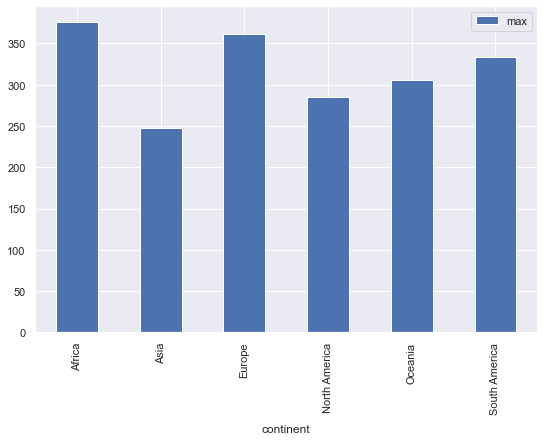

In [ ]:
drinks.groupby('continent').beer_servings.agg([ 'max']).plot(kind='bar')

<AxesSubplot:xlabel='continent'>

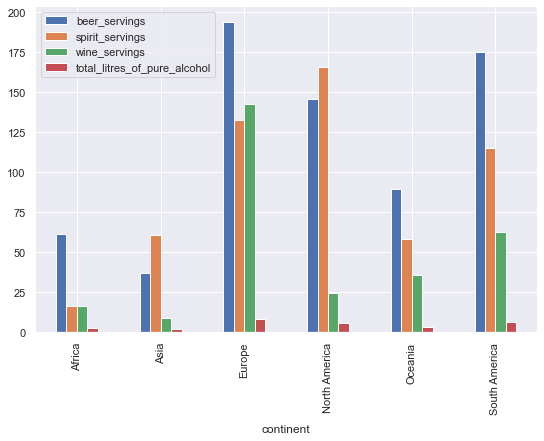

In [ ]:
drinks.groupby('continent').mean().plot(kind='bar')

In [ ]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

<AxesSubplot:xlabel='genre'>

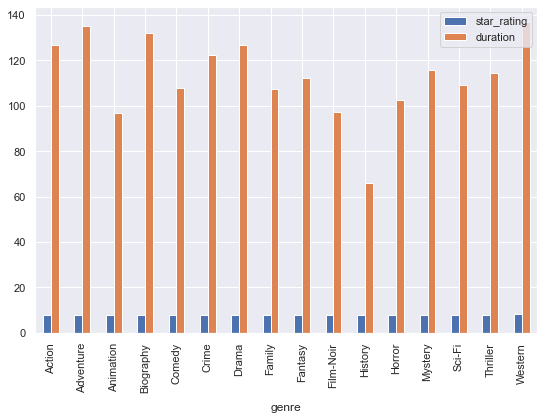

In [ ]:
movies.groupby('genre').mean().plot(kind='bar')

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list', 'mov_star'],
      dtype='object')

In [ ]:
movies['genre'].describe()


count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [ ]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [ ]:
#getting the percentage
prct = movies['genre'].value_counts(normalize=True) * 100
prct


Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Sci-Fi        0.510725
Thriller      0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: genre, dtype: float64

In [ ]:
pd.crosstab(movies.genre , movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:ylabel='Frequency'>

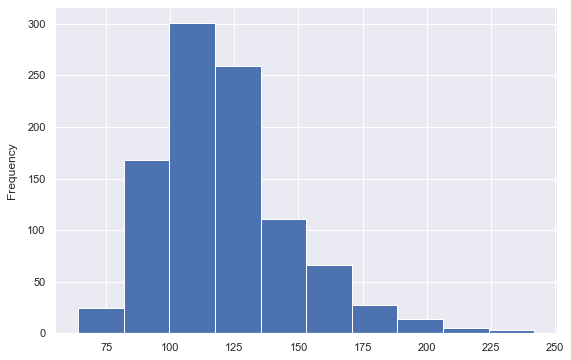

In [ ]:
movies.duration.plot(kind='hist')

<AxesSubplot:>

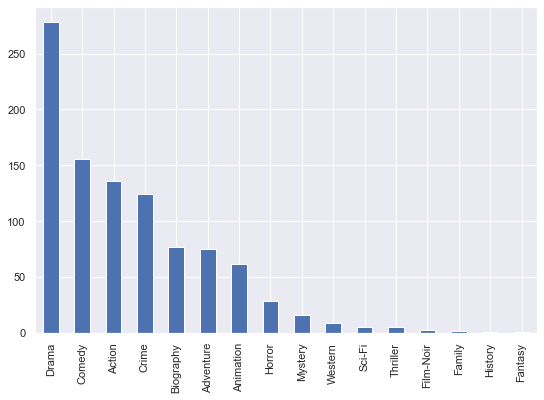

In [ ]:
movies.genre.value_counts().plot(kind='bar')

handling missing values

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [ ]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [ ]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [ ]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [ ]:
 ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


<AxesSubplot:>

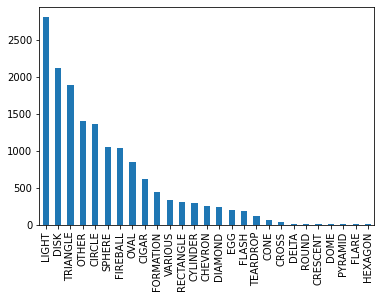

In [ ]:
ufo['Shape Reported'].value_counts().plot(kind='bar')

In [ ]:
movies.dtypes.value_counts()


object     5
float64    1
int64      1
dtype: int64

In [ ]:
drinks[drinks.continent=='South America']


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [ ]:
ufo.describe().T

,count,unique,top,freq
City,18216,6476,Seattle,187
Colors Reported,2882,27,RED,780
Shape Reported,15597,27,LIGHT,2803
State,18241,52,CA,2529
Time,18241,16145,11/16/1999 19:00,27


<AxesSubplot:>

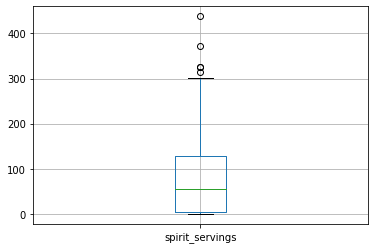

In [ ]:
drinks.boxplot(column='spirit_servings')

In [ ]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list', 'mov_star'],
      dtype='object')

In [ ]:

movies[(movies.genre=='Drama') & (movies.duration>= 120)].count()


star_rating       160
title             160
content_rating    160
genre             160
duration          160
actors_list       160
mov_star          160
dtype: int64

In [ ]:
movies.query("duration < 100 & genre =='Drama'").count()

star_rating       30
title             30
content_rating    30
genre             30
duration          30
actors_list       30
mov_star          30
dtype: int64

In [ ]:
movies['duration'].where(movies['duration'] <= 100 ).count()

210

In [ ]:
movies.duration.rank().sort_values()

389      1.0
338      2.0
258      3.0
293      4.5
88       4.5
       ...  
445    975.0
142    976.0
78     977.0
157    978.0
476    979.0
Name: duration, Length: 979, dtype: float64

<AxesSubplot:xlabel='country'>

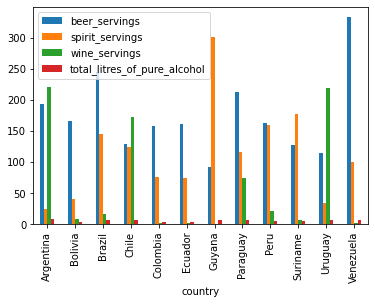

In [ ]:
drinks.set_index('country', inplace=True)
drinks[drinks.continent=='South America'].plot(kind='bar')

In [ ]:
drinks.loc['Brazil','beer_servings']

245

In [ ]:
 drinks.index.name = None
 drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
drinks.describe().loc['25%' , 'beer_servings']

20.0

In [ ]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [ ]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [ ]:
drinks.loc[0:2,'country':'total_litres_of_pure_alcohol']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7


In [ ]:
drinks.loc[drinks.country=='Egypt', 'total_litres_of_pure_alcohol']

53    0.2
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
drinks.loc[:, ['country' , 'beer_servings']]

,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217
...,...,...
188,Venezuela,333
189,Vietnam,111
190,Yemen,6
191,Zambia,32


In [ ]:
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.loc[:50, 'country' : 'wine_servings']

,country,beer_servings,spirit_servings,wine_servings
0,Afghanistan,0,0,0
1,Albania,89,132,54
2,Algeria,25,0,14
3,Andorra,245,138,312
4,Angola,217,57,45
5,Antigua & Barbuda,102,128,45
6,Argentina,193,25,221
7,Armenia,21,179,11
8,Australia,261,72,212
9,Austria,279,75,191


In [ ]:
 drinks.loc[drinks.beer_servings>=150 , 'country'].count()

59

In [ ]:
drinks.iloc[:, [0 ,4]]

,country,total_litres_of_pure_alcohol
0,Afghanistan,0.0
1,Albania,4.9
2,Algeria,0.7
3,Andorra,12.4
4,Angola,5.9
...,...,...
188,Venezuela,7.7
189,Vietnam,2.0
190,Yemen,0.1
191,Zambia,2.5


In [ ]:
drinks.dropna(how='any').shape

(193, 6)

In [ ]:
drinks.shape

(193, 6)

In [ ]:
drinks.memory_usage(deep=True).sum()

31224

In [ ]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [ ]:
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [ ]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [ ]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [ ]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         756
dtype: int64

Logical Ordering

In [ ]:
df = pd.DataFrame({'ID' :[70,90,73,103],'quality':['good', 'verygood','good','excellent']})

In [ ]:
df

,ID,quality
0,70,good
1,90,verygood
2,73,good
3,103,excellent


In [ ]:
df.sort_values

<bound method DataFrame.sort_values of     ID    quality
0   70       good
1   90   verygood
2   73       good
3  103  excellent>

In [ ]:
df['quality'] = df.quality.astype('category' , categories=['good','very good' , 'excellent'],ordered=True)

TypeError: NDFrame.astype() got an unexpected keyword argument 'categories'

Making a dummy variable


In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pd.get_dummies(train,columns=['Sex' , 'Embarked'],drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_male,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0,1,0,0


In [ ]:
train['sex_male'] = train.Sex.map({'female':0,'male':1})

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Getting dummy variable from categorical variable that has more than two possible values

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:

embarked_dummies = pd.get_dummies(train.Embarked,prefix='Embarked').iloc[:,:]

In [ ]:
train = pd.concat([train,embarked_dummies], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


Working with datetime

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [ ]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [ ]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [ ]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [ ]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [ ]:
ufo.Time.dt.days_in_month

0        30
1        30
2        28
3        30
4        30
         ..
18236    31
18237    31
18238    31
18239    31
18240    31
Name: Time, Length: 18241, dtype: int64

In [ ]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [ ]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [ ]:
%matplotlib inline
ufo['Year'] = ufo.Time.dt.year

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


<AxesSubplot:>

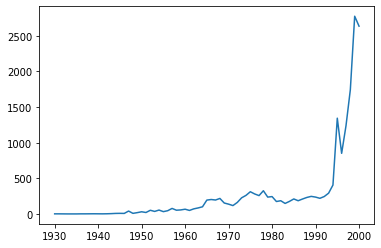

In [ ]:
ufo.Year.value_counts().sort_index().plot()

In [ ]:
ufo.duplicated().sum()

109

In [ ]:
ufo.shape

(18241, 6)

In [ ]:
ufo.loc[ufo.duplicated(keep=False),:]

,City,Colors Reported,Shape Reported,State,Time,Year
194,Miami,NaN,DISK,FL,1952-06-30 21:00:00,1952
195,Miami,NaN,DISK,FL,1952-06-30 21:00:00,1952
468,Madison,NaN,CIGAR,WI,1957-12-28 00:00:00,1957
469,Madison,NaN,CIGAR,WI,1957-12-28 00:00:00,1957
472,Winooski,NaN,OVAL,VT,1958-04-17 21:30:00,1958
...,...,...,...,...,...,...
17871,Dover,NaN,TRIANGLE,DE,2000-11-03 19:40:00,2000
18194,Walpole,GREEN,FIREBALL,NH,2000-12-26 18:20:00,2000
18195,Walpole,GREEN,FIREBALL,NH,2000-12-26 18:20:00,2000
18230,Pismo Beach,NaN,OVAL,CA,2000-12-31 20:00:00,2000


In [ ]:
ufo.drop_duplicates(keep='first').shape

(18132, 6)

In [ ]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time', 'Year'], dtype='object')

In [ ]:
ufo.duplicated(subset=['Colors Reported' , 'Time']).sum()

1593

In [ ]:
movies.loc[movies.content_rating.isnull()].count()

star_rating       3
title             3
content_rating    0
genre             3
duration          3
actors_list       3
mov_star          3
dtype: int64

In [ ]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Overwrite with nan using numpy

In [ ]:
import numpy as np
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
movies.content_rating.isnull().sum()

68

In [ ]:
top_movies = movies.loc[movies.star_rating >= 9 , :].copy()

In [ ]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","The Shawshank Redemption : [u'Tim Robbins', u'..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","The Godfather : [u'Marlon Brando', u'Al Pacino..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","The Dark Knight : [u'Christian Bale', u'Heath ..."


In [ ]:
top_movies.loc[0:'duration'] = 150

In [ ]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
0,150,150,150,150,150,150,150
1,150,150,150,150,150,150,150
2,150,150,150,150,150,150,150
3,150,150,150,150,150,150,150


In [ ]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,mov_star
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","The Shawshank Redemption : [u'Tim Robbins', u'..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","The Godfather : [u'Marlon Brando', u'Al Pacino..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","The Godfather: Part II : [u'Al Pacino', u'Robe..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","The Dark Knight : [u'Christian Bale', u'Heath ..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","Pulp Fiction : [u'John Travolta', u'Uma Thurma..."


change display options

In [ ]:
pd.get_option('display.max_rows')

60

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
pd.get_option('display.max_columns')

20

In [ ]:
pd.set_option('display.max_colwidth',1000)

In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [ ]:
pd.reset_option('all')

c:\Users\omora\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\_config\config.py:645: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
c:\Users\omora\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\_config\config.py:645: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


create a pandas DataFrame from another object

In [ ]:
pd.DataFrame({'id' : [100,101,102] , 'color':['red','blue','red']})

,id,color
0,100,red
1,101,blue
2,102,red


In [ ]:
df = pd.DataFrame({'id' : [100,101,102] , 'color':['red','blue','red']},columns=['id','color'],index=['a','b','c'])

In [ ]:
pd.DataFrame([[100,'red'],[101,'blue'],[102,'red']],columns=['id','color'])

,id,color
0,100,red
1,101,blue
2,102,red


In [ ]:
arr = np.random.rand(4,2)
arr

array([[0.01932332, 0.84799809],
       [0.10522499, 0.08148349],
       [0.4847703 , 0.0334065 ],
       [0.09185013, 0.44993261]])

In [ ]:
pd.DataFrame(arr,columns=['one','two'])

,one,two
0,0.019323,0.847998
1,0.105225,0.081483
2,0.484770,0.033407
3,0.091850,0.449933


In [ ]:
  pd.DataFrame({'student':np.arange(100,110,1),'test':np.random.randint(60,101,10)}).set_index('student')

,test
student,
100,74
101,96
102,78
103,80
104,89
105,85
106,94
107,88
108,95


Add a series to existing dataframe

In [ ]:
s = pd.Series(['round','square'],index=['c','b'],name='shape')

In [ ]:
df

,id,color
a,100,red
b,101,blue
c,102,red


In [ ]:
pd.concat([df,s],axis=1)

,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


Apply a function to a series

In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train['Sex_num'] = train.Sex.map({'female':0,'male':1})

In [ ]:
train.loc[0:4,['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [ ]:
train['Name_length'] = train.Name.apply(len)

In [ ]:
train.Name_length

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name_length, Length: 891, dtype: int64

Round

In [ ]:
train['fare_ceil'] = train.Fare.apply(np.ceil)

In [ ]:
train.loc[0:4,['Fare', 'fare_ceil']]

,Fare,fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [ ]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [ ]:
def get_element(My_list,position):
    return My_list[position]

In [ ]:


train.Name.str.split(',').apply(get_element,position=0)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

doing it with lambda func

In [ ]:

from requests import head


train.Name.str.split(',').apply(lambda x:x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

Apply to every element

In [ ]:
drinks.loc[:,'beer_servings':'wine_servings'] = drinks.loc[:,'beer_servings':'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


Multindexing

In [ ]:
stocks = pd.read_csv('http://bit.ly/smallstocks')

In [ ]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [ ]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [ ]:
stocks.groupby('Symbol').Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [ ]:
ser = stocks.groupby(['Symbol','Date']).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [ ]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [ ]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [ ]:
df = stocks.pivot_table(values='Close', index='Symbol',columns='Date')
df.unstack()

Date        Symbol
2016-10-03  AAPL      112.52
            CSCO       31.50
            MSFT       57.42
2016-10-04  AAPL      113.00
            CSCO       31.35
            MSFT       57.24
2016-10-05  AAPL      113.05
            CSCO       31.59
            MSFT       57.64
dtype: float64

In [ ]:
ser.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [ ]:
ser.loc['AAPL','2016-10-03' ]

112.52

In [ ]:
ser.loc[:,'2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [ ]:
df.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: AAPL, dtype: float64

In [ ]:
df.loc['AAPL','2016-10-03' ]

112.52

In [ ]:
stocks.set_index(['Symbol','Date'],inplace=True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [ ]:
stocks.index

MultiIndex([('CSCO', '2016-10-03'),
            ('AAPL', '2016-10-03'),
            ('MSFT', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('MSFT', '2016-10-04'),
            ('CSCO', '2016-10-04'),
            ('MSFT', '2016-10-05'),
            ('CSCO', '2016-10-05'),
            ('AAPL', '2016-10-05')],
           names=['Symbol', 'Date'])

In [ ]:
stocks.sort_index(inplace=True)
stocks.unstack()

Close                           Volume                      
Date   2016-10-03 2016-10-04 2016-10-05 2016-10-03 2016-10-04 2016-10-05
Symbol                                                                  
AAPL       112.52     113.00     113.05   21701800   29736800   21453100
CSCO        31.50      31.35      31.59   14070500   18460400   11808600
MSFT        57.42      57.24      57.64   19189500   20085900   16726400

In [ ]:
stocks.loc[(['AAPL', 'MSFT' ], '2016-10-04'),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900


In [ ]:
stocks.loc[(['AAPL', 'MSFT' ], ['2016-10-04','2016-10-03']),'Close']

Symbol  Date      
AAPL    2016-10-04    113.00
        2016-10-03    112.52
MSFT    2016-10-04     57.24
        2016-10-03     57.42
Name: Close, dtype: float64

In [ ]:
stocks.loc[('AAPL', ['2016-10-04','2016-10-03']),'Close']

Symbol  Date      
AAPL    2016-10-04    113.00
        2016-10-03    112.52
Name: Close, dtype: float64

In [ ]:
stocks.loc[(slice(None), ['2016-10-04','2016-10-03']),'Close']

Symbol  Date      
AAPL    2016-10-04    113.00
CSCO    2016-10-04     31.35
MSFT    2016-10-04     57.24
AAPL    2016-10-03    112.52
CSCO    2016-10-03     31.50
MSFT    2016-10-03     57.42
Name: Close, dtype: float64

In [ ]:

from scipy import stats

stats.trim_mean(drinks['beer_servings'],0.1)

94.30322580645161

In [ ]:
stats.trim_mean(drinks['wine_servings'],0.1)

31.283870967741937

In [ ]:
drinks['continent'] = drinks.continent.astype('category')

In [ ]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [ ]:
drinks.agg(['mean','min','max'])

C:\Users\omora\AppData\Local\Temp\ipykernel_7452\2989800211.py:1: FutureWarning: ['country', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drinks.agg(['mean','min','max'])


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
mean,NaN,106.160622,80.994819,49.450777,4.717098
min,Afghanistan,0.000000,0.000000,0.000000,0.000000
max,Zimbabwe,376.000000,438.000000,370.000000,14.400000


In [ ]:
drinks.iloc[1,4]

4.9

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
drinks.iloc[4,drinks.columns.get_loc('spirit_servings')]

57.0

In [ ]:
drinks.shape

(193, 6)

In [ ]:
drinks.dropna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:


drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
drinks.rename(columns={'country':'Country'},inplace=True)

In [ ]:
drinks

,Cou_ntry,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
drinks.rename(columns={'country':'Country'},inplace=True)

In [ ]:
drinks

,Cou_ntry,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


Creating an ordered category

In [ ]:
 df = pd.DataFrame({'ID':[100,101,102,103], 'quality':['good','verygood','good','excellent']})
 df

,ID,quality
0,100,good
1,101,verygood
2,102,good
3,103,excellent


In [ ]:
df.columns = ['IDD' , 'Quality']
df.columns

Index(['IDD', 'Quality'], dtype='object')

In [ ]:
#new way 
from pandas.api.types import CategoricalDtype
quality_cat = CategoricalDtype(['good','very good' , 'excellent'],ordered=True)
df['quality'] = df.quality.astype(quality_cat)
df.quality

0         good
1          NaN
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): ['good' < 'very good' < 'excellent']

reverse row order

In [ ]:
drinks.loc[::-1].head()

,Cou_ntry,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64.0,18.0,4.0,4.7,Africa
191,Zambia,32.0,19.0,4.0,2.5,Africa
190,Yemen,6.0,0.0,0.0,0.1,Asia
189,Vietnam,111.0,2.0,1.0,2.0,Asia
188,Venezuela,333.0,100.0,3.0,7.7,South America


In [ ]:
#reset index so it starts with zero 
drinks.loc[::-1].reset_index(drop=True).head(20)

,Cou_ntry,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64.0,18.0,4.0,4.7,Africa
1,Zambia,32.0,19.0,4.0,2.5,Africa
2,Yemen,6.0,0.0,0.0,0.1,Asia
3,Vietnam,111.0,2.0,1.0,2.0,Asia
4,Venezuela,333.0,100.0,3.0,7.7,South America
5,Vanuatu,21.0,18.0,11.0,0.9,Oceania
6,Uzbekistan,25.0,101.0,8.0,2.4,Asia
7,Uruguay,115.0,35.0,220.0,6.6,South America
8,USA,249.0,158.0,84.0,8.7,North America
9,Tanzania,36.0,6.0,1.0,5.7,Africa


reverse column order

In [ ]:
drinks.loc[:,::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,Cou_ntry
0,Asia,0.0,0.0,0.0,0.0,Afghanistan
1,Europe,4.9,54.0,132.0,89.0,Albania
2,Africa,0.7,14.0,0.0,25.0,Algeria
3,Europe,12.4,312.0,138.0,245.0,Andorra
4,Africa,5.9,45.0,57.0,217.0,Angola


Select columns by data type

In [ ]:
drinks.dtypes

Cou_ntry                          object
beer_servings                    float64
spirit_servings                  float64
wine_servings                    float64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [ ]:
drinks.select_dtypes(include='number')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,333.0,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


In [79]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.loc[0,:]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [ ]:
ufo.shape

(18241, 5)

In [ ]:
ufo.loc[[0,2,4,6],:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


In [ ]:
ufo.loc[0:10,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [ ]:
ufo.loc[:,'City'].value_counts()

Seattle                       187
New York City                 161
Phoenix                       137
Houston                       108
Las Vegas                     105
                             ... 
Neb.-Mo. Line                   1
Carlsberg                       1
Yukon                           1
Dolly Sods Wilderness Area      1
Ybor                            1
Name: City, Length: 6476, dtype: int64

In [ ]:
ufo.loc[:,['City','State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [ ]:
ufo.loc[:,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [83]:
ufo.loc[ufo.City=='Oakland'].count()

City               13
Colors Reported     0
Shape Reported     11
State              13
Time               13
dtype: int64

In [ ]:
ufo.iloc[:,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [ ]:
clipboard = pd.read_clipboard()

In [ ]:
clipboard

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
drinks['total_litres_of_pure_alcohol'].quantile([.05,.25,.5,.75,.95])

0.05     0.00
0.25     1.30
0.50     4.20
0.75     7.20
0.95    11.34
Name: total_litres_of_pure_alcohol, dtype: float64

Text(0, 0.5, 'total_litres_of_pure_alcohol')

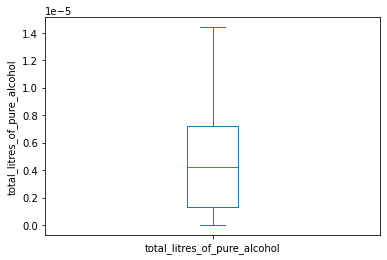

In [ ]:
ax = (drinks['total_litres_of_pure_alcohol']/1_000_000).plot.box()
ax.set_ylabel('total_litres_of_pure_alcohol')

In [85]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [88]:
d = drinks.groupby('continent')

In [93]:
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object